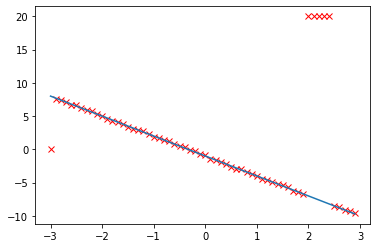

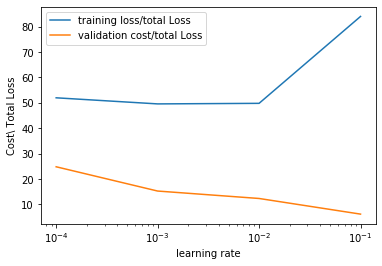

i [[1.5846   ]
 [1.5563453]
 [1.5280907]]
i [[4.1113014]
 [4.007595 ]
 [3.9038887]]
i [[4.3233943]
 [4.202715 ]
 [4.0820355]]
i [[12.67061 ]
 [12.230707]
 [11.790803]]


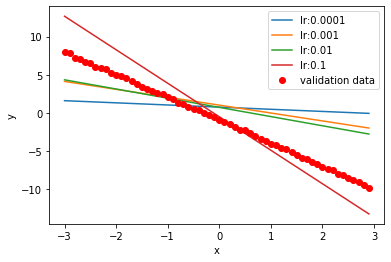

yhat=  tensor([[4.3234]], grad_fn=<AddmmBackward>)  y =  tensor([[0.]])
yhat=  tensor([[4.2027]], grad_fn=<AddmmBackward>)  y =  tensor([[7.5839]])
yhat=  tensor([[4.0820]], grad_fn=<AddmmBackward>)  y =  tensor([[7.3676]])
yhat=  tensor([[3.9614]], grad_fn=<AddmmBackward>)  y =  tensor([[7.0851]])
yhat=  tensor([[3.8407]], grad_fn=<AddmmBackward>)  y =  tensor([[6.6446]])
yhat=  tensor([[3.7200]], grad_fn=<AddmmBackward>)  y =  tensor([[6.6686]])
yhat=  tensor([[3.5993]], grad_fn=<AddmmBackward>)  y =  tensor([[6.2007]])
yhat=  tensor([[3.4786]], grad_fn=<AddmmBackward>)  y =  tensor([[5.9171]])
yhat=  tensor([[3.3580]], grad_fn=<AddmmBackward>)  y =  tensor([[5.7502]])
yhat=  tensor([[3.2373]], grad_fn=<AddmmBackward>)  y =  tensor([[5.2665]])
yhat=  tensor([[3.1166]], grad_fn=<AddmmBackward>)  y =  tensor([[5.0560]])
yhat=  tensor([[2.9959]], grad_fn=<AddmmBackward>)  y =  tensor([[4.4948]])
yhat=  tensor([[2.8752]], grad_fn=<AddmmBackward>)  y =  tensor([[4.1955]])
yhat=  tensor([[

In [13]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
import numpy as np
import matplotlib.pyplot as plt


class data(Dataset):
    def __init__(self, train=True):
        self.x = torch.arange(-3,3,0.1).view(-1,1)
        self.f = -3*self.x -1
        self.y = self.f + 0.1* (torch.randn(self.x.size()))
        
        if(train):
            self.y[0] = 0
            self.y[50:55] = 20
        else:
            pass
        
        self.len = self.x.shape[0]
    
    def __getitem__(self,id):
        return self.x[id],self.y[id]
    
    def __len__(self):
        return self.len
    

class LR(nn.Module):
    def __init__(self,start,end):
        super(LR,self).__init__()
        self.linear = nn.Linear(start,end)
    def forward (self,x):
        yhat = self.linear(x)
        return yhat
    
train_data = data()
valid_data = data(train=False)

plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr')
plt.plot(train_data.x.numpy(), train_data.f.numpy())
plt.show()

criterion = nn.MSELoss()
trainloader = DataLoader(train_data,batch_size=1)

lr_list = [0.0001, 0.001, 0.01, 0.1]
train_errors = torch.zeros(len(lr_list))
valid_errors = torch.zeros(len(lr_list))

MODELS =[]

def the_model(iter, lr_list):
    for i, lr in enumerate(lr_list):
        model = LR(1,1)
        optimizer = optim.SGD(model.parameters(),lr=lr)
        for epoch in range(iter):
            for x,y in trainloader:
                yhat = model.forward(x)
                loss = criterion(yhat,y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
        
        #train_data
        yhat = model(train_data.x)
        loss = criterion(yhat,train_data.y)
        train_errors[i]=loss.item()
        
        #valid_data
        yhat = model(valid_data.x)
        loss = criterion(yhat,valid_data.y)
        valid_errors[i] = loss.item()

        MODELS.append(model)
        
the_model(10,lr_list)


plt.semilogx(np.array(lr_list), train_errors.numpy(), label = 'training loss/total Loss')
plt.semilogx(np.array(lr_list), valid_errors.numpy(), label = 'validation cost/total Loss')
plt.ylabel('Cost\ Total Loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()

i=0
for model,lrs in zip (MODELS,lr_list):
    yhat = model(valid_data.x)
    plt.plot(valid_data.x.numpy(), yhat.detach().numpy(), label = 'lr:' + str(lrs))
    print('i', yhat.detach().numpy()[0:3])
    
plt.plot(valid_data.x.numpy(),valid_data.y.numpy(),'or', label = 'validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


good_model = MODELS[2]
for x,y in trainloader:
    print("yhat= ",good_model(x)," y = ",y)